# Exploring Anscombes Quartet in R with Jupyter Notebook

[Anscombes Quartet](https://www.wikiwand.com/en/Anscombe's_quartet) comprises four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties. He described the article as being intended to attack the impression among statisticians that "numerical calculations are exact, but graphs are rough."

Here we use r inside a jupyter notebook to briefly explore and then graph these datasets to highlight the importance of visually inspecting data.

In [16]:
# libs
library(dplyr)
library(ggplot2)
library(reshape2)

In [17]:
# reshape
a <- reshape(anscombe, varying=names(anscombe), sep="", direction="long", timevar="s")

In [18]:
# reset rownames
rownames(a) <- NULL

# tidy columns a little
colnames(a) <- c("set", "x", "y", "id")
a <- a[,c("set", "id", "x", "y")]

In [19]:
# factorise set
a$set <- as.factor(a$set)

In [20]:
summary(a)

 set          id           x            y         
 1:11   Min.   : 1   Min.   : 4   Min.   : 3.100  
 2:11   1st Qu.: 3   1st Qu.: 7   1st Qu.: 6.117  
 3:11   Median : 6   Median : 8   Median : 7.520  
 4:11   Mean   : 6   Mean   : 9   Mean   : 7.501  
        3rd Qu.: 9   3rd Qu.:11   3rd Qu.: 8.748  
        Max.   :11   Max.   :19   Max.   :12.740  

In [21]:
# Create a conveniant mode f(x)
Mode <- function(x) {
    ux <- unique(x)
    ux[which.max(tabulate(match(x, ux)))]
}

The great feature of Anscombe's Quartet is that the summary statistics for each set are almost identical, which could lead you to assume that the datasets are almost identical too.

In [25]:
# Summary Statistics
a %>% 
    group_by(set) %>% 
    summarise(Num=n(),
              mean.x=mean(x),
              median.x=median(x),
              mode.x=Mode(x),
              mean.y=mean(y),
              median.y=median(y),
              mode.y=Mode(y),
              cor.xy=cor(x,y)) %>% 
    print()

Source: local data frame [4 x 9]

     set   Num mean.x median.x mode.x   mean.y median.y mode.y    cor.xy
  (fctr) (int)  (dbl)    (dbl)  (dbl)    (dbl)    (dbl)  (dbl)     (dbl)
1      1    11      9        9     10 7.500909     7.58   8.04 0.8164205
2      2    11      9        9     10 7.500909     8.14   9.14 0.8162365
3      3    11      9        9     10 7.500000     7.11   7.46 0.8162867
4      4    11      9        8      8 7.500909     7.04   6.58 0.8165214


But if we visually compare them then it becomes apparent how different these datasets are.

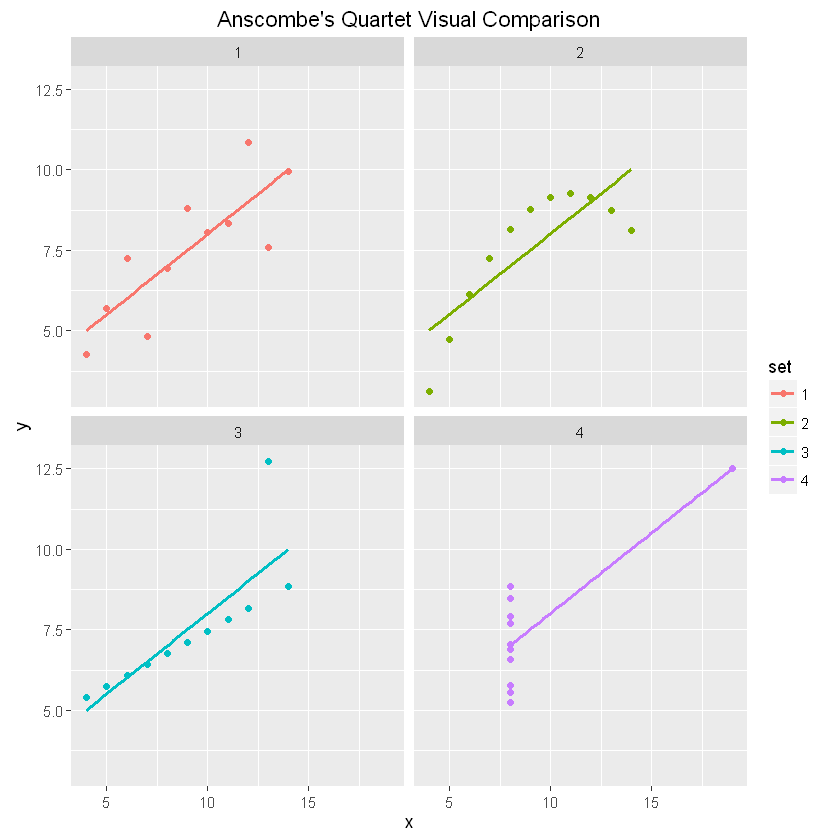

In [28]:
a %>% 
    ggplot(aes(x=x, y=y, colour=set)) + 
    geom_point() + 
    facet_wrap(~ set) +
    geom_smooth(method = "lm", se = FALSE) +
    ggtitle("Anscombe's Quartet Visual Comparison")

Demonstrating the importance of visually inspecting your data first.